In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
np.random.seed(0)

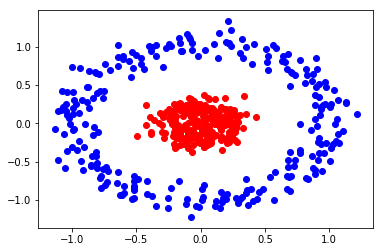

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples = n_pts, random_state = 123, noise=0.1, factor = 0.2)
plt.scatter(X[y==0,0],X[y==0,1], color= 'blue')
plt.scatter(X[y==1,0],X[y==1,1], color= 'red')

In [4]:
model = Sequential()
model.add(Dense(4,input_shape= (2,), activation ='sigmoid'))
model.add(Dense(1, activation ='sigmoid'))
model.compile(Adam(lr = 0.01), 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
h = model.fit(x=X, y=y, verbose =1, batch_size = 20, epochs = 60, shuffle = 'true')

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
500/500 [==============================] - 0s 669us/step - loss: 0.6964 - acc: 0.5120
Epoch 2/60
500/500 [==============================] - 0s 82us/step - loss: 0.6938 - acc: 0.6180
Epoch 3/60
500/500 [==============================] - 0s 102us/step - loss: 0.6926 - acc: 0.5180
Epoch 4/60
500/500 [==============================] - 0s 124us/step - loss: 0.6916 - acc: 0.6760
Epoch 5/60
500/500 [==============================] - ETA: 0s - loss: 0.6687 - acc: 0.950 - 0s 100us/step - loss: 0.6905 - acc: 0.6320
Epoch 6/60
500/500 [==============================] - 0s 121us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/60
500/500 [==============================] - 0s 150us/step - loss: 0.6866 - acc: 0.6480
Epoch 8/60
500/500 [==============================] - 0s 128us/step - loss: 0.6839 - acc: 0.6700
Epoch 9/60
500/500 [==============================] - 0s 98us/step - loss: 0.6797 - acc: 0.7580
Epoch 10/60
500/500 [======================

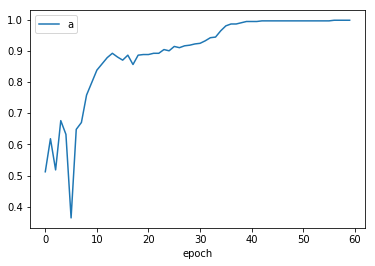

In [6]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend('acc')

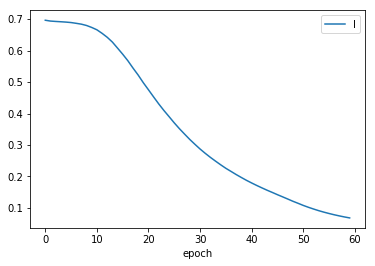

In [7]:
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend('loss')

In [8]:
def plot_decision_boundary(X,Y, model):
    x_span = np.linspace(min(X[:, 0])-1,max(X[:,0])+1)
    y_span = np.linspace(min(X[:, 1])-1,max(X[:,1])+1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_arr=model.predict(grid)
    z = pred_arr.reshape(xx.shape)
    plt.contourf(xx,yy,z)

prediction is:  [[0.00017781]]


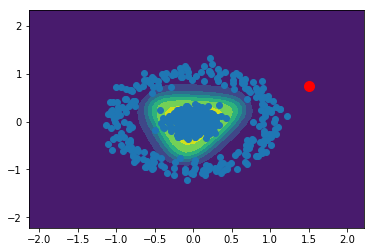

In [10]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 1.5
y = 0.75
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)